# **Titanic Survival Analysis**

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/titanic_data.csv')
df.head(10)

#SibSp - Siblings Spouse  , Parch - Parents & childrens  , Embarked --> C-Cherburg , Q-Queenstown , S- Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Dataset Overview

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we have a general idea of the data set contents.

## Data Cleaning

### Checking for duplicates

In [ ]:
df.duplicated()

#No duplicated data

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### Dropping unwanted columns 

In [ ]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.head(5) #I felt 'Name' & 'Ticket' will not be feature so I just dropped those 2.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Checking for null Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note : I preprocessed the data when I need to used the particular data . If you want to clean the data in this steps means you can do by verifying my notebook.

### Checking for Outliers

In [ ]:
df.skew()
#The skewness was good for all colunms which I'm going to use . if you are going to use 'Fare' & 'Family_Size' means you have to use transformation techniques to remove skewness .

Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
Fare           4.787317
Family_Size    2.727441
dtype: float64

## Exploratory Data Analysis (EDA)

###Univariate Analysis

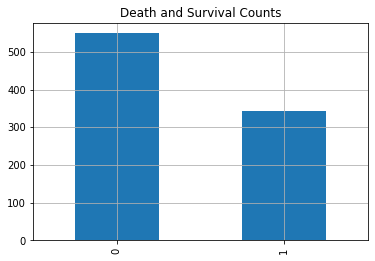

In [ ]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

From this,we infer that majority of people did not survive the accident.

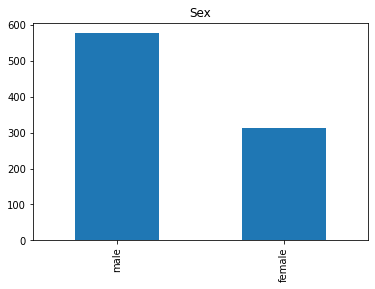

In [ ]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

It can be infered that the majority of people in the ship were male.

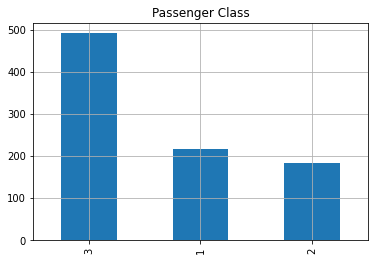

In [ ]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',grid=True)
plt.show()

It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.

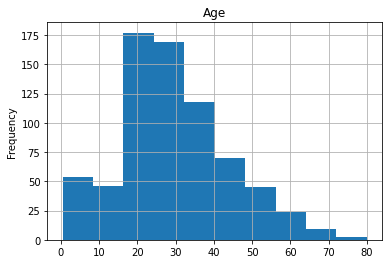

In [ ]:
df['Age'].plot(kind='hist',title='Age',grid=True)
plt.show()

It can be infered that majority of passengers were in the age group 15-30 years.

### Bivariate Analysis

#### Feature1 : Passenger Class 

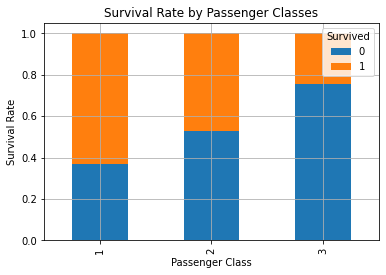

In [ ]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Those in First Class has the highest chance for survival.

#### Feature2 : Sex

We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

In [ ]:
df['Sex'].replace('male',int (1),inplace=True)
df['Sex'].replace('female',int (0),inplace=True)

In [ ]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2

Survived,0,1
Sex,,
0,81,233
1,468,109


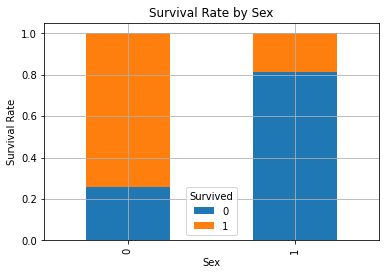

In [ ]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked='True',grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

The majority of females survived, whereas the majority of males did not.

Count males and females in each Pclass:

In [ ]:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [ ]:
for i in passenger_classes:
        print ('M : ',i ,len(df[(df['Sex'] == 1)  & (df['Pclass'] == i)]))
        print ('F : ',i ,len(df[(df['Sex'] ==0) & (df['Pclass'] == i)]))
male=df[df['Sex']==1]
female=df[df['Sex']==0]

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


Plot survival rate by Sex and Pclass:

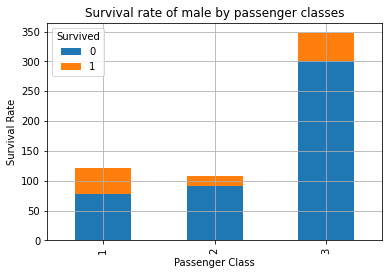

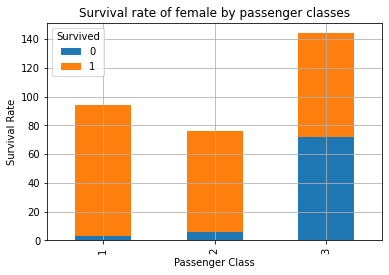

In [ ]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [ ]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

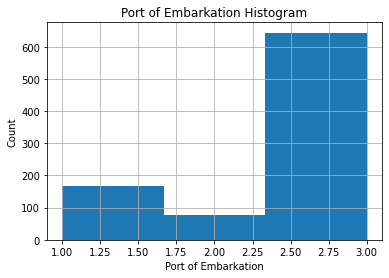

In [ ]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

#### Feature3: Embarked

In [ ]:
df['Embarked'].isnull().sum()

2

In [ ]:
df['Embarked'].dropna()
df['Embarked'].isnull().sum()

2

Thus we can see that the Embarked Column is missing certain values, which have to be filled otherwise it may cause problems during the machine learning algorithms.

In [ ]:
df['Embarked_Value']=df['Embarked']
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_Value
0,1,0,3,1,22.0,1,0,7.2500,NaN,S,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S,S
5,6,0,3,1,NaN,0,0,8.4583,NaN,Q,Q
6,7,0,1,1,54.0,0,0,51.8625,E46,S,S
7,8,0,3,1,2.0,3,1,21.0750,NaN,S,S
8,9,1,3,0,27.0,0,2,11.1333,NaN,S,S
9,10,1,2,0,14.0,1,0,30.0708,NaN,C,C


We make a new column 'Embarked_Value'and replace C,Q,S with 1,2,3 so that we can carry out our machine learning algorithms on it.

In [ ]:
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)

In [ ]:
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0, nan]

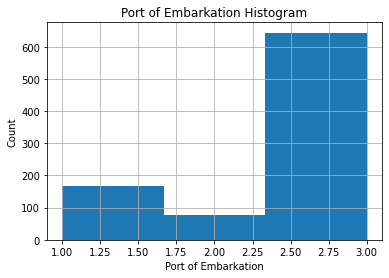

In [ ]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [ ]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0]

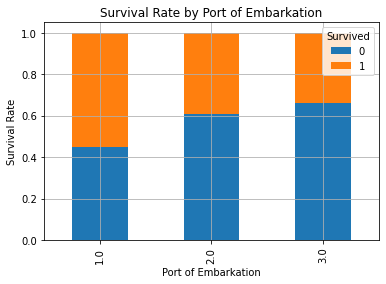

In [ ]:
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

#### Feature4 : Age

In [ ]:
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_Value
5,6,0,3,1,NaN,0,0,8.4583,NaN,Q,2.0
17,18,1,2,1,NaN,0,0,13.0000,NaN,S,3.0
19,20,1,3,0,NaN,0,0,7.2250,NaN,C,1.0
26,27,0,3,1,NaN,0,0,7.2250,NaN,C,1.0
28,29,1,3,0,NaN,0,0,7.8792,NaN,Q,2.0
29,30,0,3,1,NaN,0,0,7.8958,NaN,S,3.0
31,32,1,1,0,NaN,1,0,146.5208,B78,C,1.0
32,33,1,3,0,NaN,0,0,7.7500,NaN,Q,2.0
36,37,1,3,1,NaN,0,0,7.2292,NaN,C,1.0
42,43,0,3,1,NaN,0,0,7.8958,NaN,C,1.0


Here also many ages are missing. So we assign the missing ages the median values of the age 
according to their sex and passenger class.

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


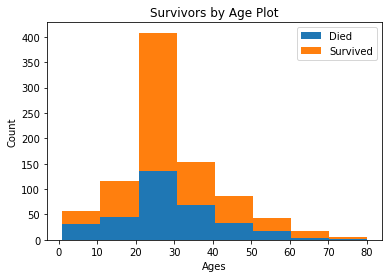

In [ ]:
age_survived=df[df['Survived']==1]['Age']
age_not_survived = df[df['Survived'] == 0]['Age']
max_age=max(df['Age'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

For more detailed analysis,we draw the age density plots.

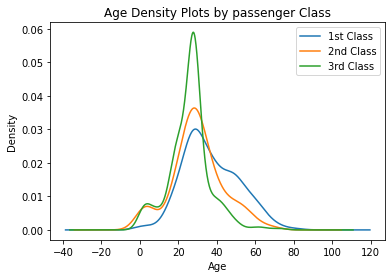

In [ ]:
for i in passenger_classes :
        df.Age[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

Thus we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.

#### Feature5 : Family Size

We define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

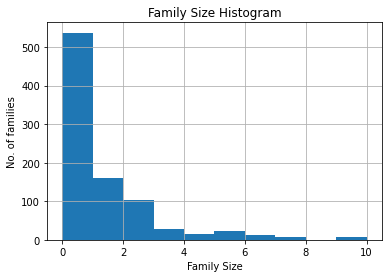

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


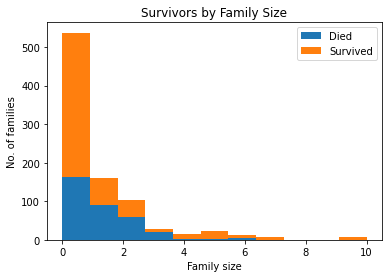

In [ ]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

## Machine Learning Model

In [ ]:
#dropping unwanted colums
df.drop(columns=['Cabin','Embarked','SibSp','Parch','PassengerId','Embarked_Value'],inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_Size
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
5,0,3,1,28.0,8.4583,0
6,0,1,1,54.0,51.8625,0
7,0,3,1,2.0,21.0750,4
8,1,3,0,27.0,11.1333,2
9,1,2,0,14.0,30.0708,1


In [ ]:
#Splitting Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

#importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#Splitting Train & Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Save the model for deployment
import joblib
joblib.dump(clf, "titanic_model.pkl")

# Load the saved model for deployment
clf_loaded = joblib.load("titanic_model.pkl")

# Use the loaded model to make predictions
y_pred_deploy = clf_loaded.predict(X_test)

Accuracy: 0.8324022346368715
Confusion Matrix:
[[101   9]
 [ 21  48]]


 **Accuracy of my model is 0.8324022346368715**